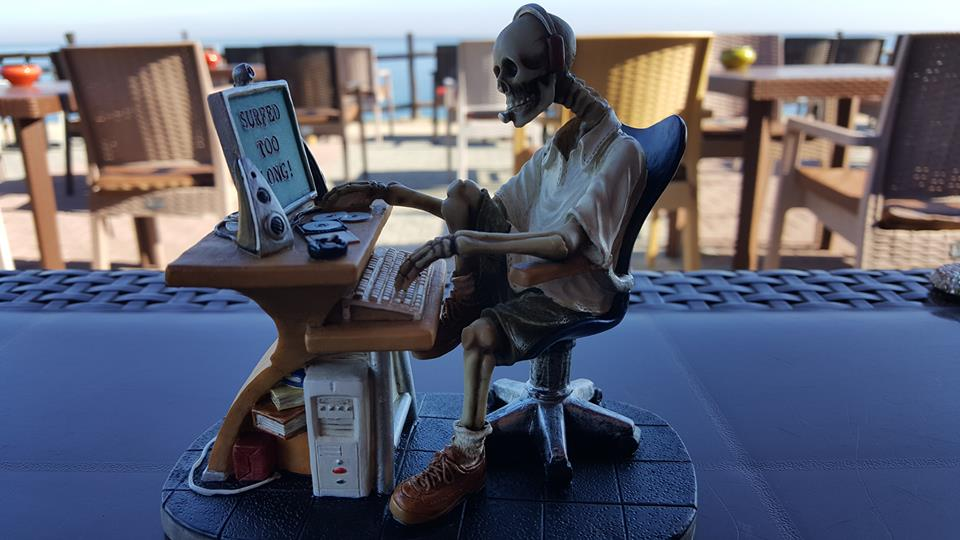

# Introduction 

# I will be analysing Stackoverflow Developer Survey 2018 dataset for this notebook to find the typical life of software developer. 

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
from plotly.tools import FigureFactory as ff
import pycountry
import random
import squarify
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [ ]:
df = pd.read_csv('../input/survey_results_public.csv')
schema = pd.read_csv('../input/survey_results_schema.csv')

# Data Exploration 

In [ ]:
 df.shape

In [ ]:
df.head()

In [ ]:
df.columns.values

# survey_results_schema 

contains each column name from the main results along with the question text corresponding to that column

In [ ]:
pd.options.display.max_colwidth = 300
schema

# Data analysis

# 1)What time developers wake up

In [ ]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

def simple_graph(dataframe,type_of_graph, top = 0):
    data_frame = df[dataframe].value_counts()
    layout = go.Layout()
    
    if type_of_graph == 'barh':
        top_category = get_list(df[dataframe].dropna())
        if top !=None:
            data = [go.Bar(
                x=top_category[1].head(top),
                y=top_category[0].head(top),
                orientation = 'h',
                marker=dict(color=random_colors(10), line=dict(color='rgb(8,48,107)',width=1.5,)),
                opacity = 0.6
            )]
        else:
            data = [go.Bar(
            x=top_category[1],
            y=top_category[0],
            orientation = 'h',
            marker=dict(color=random_colors(10), line=dict(color='rgb(8,48,107)',width=1.5,)),
            opacity = 0.6
        )]

    elif type_of_graph == 'barv':
        top_category = get_list(df[dataframe].dropna())
        if top !=None:
            data = [go.Bar(
                x=top_category[0].head(top),
                y=top_category[1].head(top),
                marker=dict(color=random_colors(10), line=dict(color='rgb(8,48,107)',width=1.5,)),
                opacity = 0.6
        )]
        else:
            data = [go.Bar(
                x=top_category[0],
                y=top_category[1],
                marker=dict(color=random_colors(10), line=dict(color='rgb(8,48,107)',width=1.5,)),
                opacity = 0.6
            )]      

    elif type_of_graph == 'pie':
        data = [go.Pie(
            labels = data_frame.index,
            values = data_frame.values,
            marker = dict(colors = random_colors(20)),
            textfont = dict(size = 20)
        )]
    
    elif type_of_graph == 'pie_':
        data = [go.Pie(
            labels = data_frame.index,
            values = data_frame.values,
            marker = dict(colors = random_colors(20)),
            textfont = dict(size = 20)
        )]
        layout = go.Layout(legend=dict(orientation="h"), autosize=False,width=700,height=700)
        pass
    
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)
   
def get_list(col_name):
    full_list = ";".join(col_name)
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word)

simple_graph('WakeTime','barv',5)

# 2)code as a hobby

In [ ]:
simple_graph('Hobby','pie')

# Countries where coding is a hobby

In [ ]:
data = df[ (df['Hobby'] == 'Yes')]
country = data["Country"].dropna()

for i in country.unique():
    if country[country == i].count() < 600:
        country[country == i] = 'Others'
x = 0
y = 0
width = 50
height = 50
type_list = country.value_counts().index
values = country.value_counts().values

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = random_colors(20)
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 1 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}".format(type_list[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)

layout = dict(
    height=600, 
    width=850,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF"),
    margin = go.Margin(
            l=0,
            r=0,
            pad=0
        )
)

figure = dict(data=[trace0], layout=layout)
iplot(figure)

# 3)How many Developers enrolled in a formal, degree-granting college or university program?

In [ ]:
simple_graph('Student', 'pie')

# 4) Are coders happy to code ?

In [ ]:
simple_graph('JobSatisfaction','pie')

# 5)How many times does developers checkin code

In [ ]:
simple_graph('CheckInCode','barv',10)

# 6)Which programing language does open source people use

In [ ]:
def get_list(col_name):
    full_list = ";".join(col_name)
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word)
data = df[df['OpenSource'] == 'Yes']

data = get_list(df['LanguageWorkedWith'].dropna())

x = 0
y = 0
width = 50
height = 50
type_list = data[0]
values = data[1]

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

color_brewer = random_colors(20)
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append( 
        dict(
            type = 'rect', 
            x0 = r['x'], 
            y0 = r['y'], 
            x1 = r['x']+r['dx'], 
            y1 = r['y']+r['dy'],
            line = dict( width = 1 ),
            fillcolor = color_brewer[counter]
        ) 
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = "{}".format(type_list[counter]),
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(color_brewer):
        counter = 0

trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects ], 
    y = [ r['y']+(r['dy']/2) for r in rects ],
    text = [ str(v) for v in values ], 
    mode = 'text',
)

layout = dict(
    height=600, 
    width=850,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest',
    font=dict(color="#FFFFFF"),
    margin = go.Margin(
            l=0,
            r=0,
            pad=0
        )
)

figure = dict(data=[trace0], layout=layout)
iplot(figure)


# Top 10 languages worked in the year 2018

In [ ]:
def bubble_chart(col):
    data = get_list(df[col].dropna())
    data = data[:10]
    data = data.reindex(index=data.index[::-1])

    size = np.array(data[1]*0.001)
    size
    trace0 = go.Scatter(
        x=data[0],
        y=data[1],
        mode='markers',
        marker=dict(color = random_colors(10),size= size)
    )

    data = [trace0]
    py.iplot(data)
bubble_chart('LanguageWorkedWith')

# Top 10 desire language to work in the year 2019 :

In [ ]:
bubble_chart('LanguageDesireNextYear')

# Top 10 Databases worked in the year 2018

In [ ]:
bubble_chart('DatabaseWorkedWith')

# Top 10 desire Databases to work in the year 2019

In [ ]:
bubble_chart('DatabaseDesireNextYear')

# Top 10 Platforms worked in the year 2018

In [ ]:
bubble_chart('PlatformWorkedWith')

# Top 10 desire Platforms to work in the year 2019

In [ ]:
bubble_chart('PlatformDesireNextYear')

# Top frameworks worked in the year 2018

In [ ]:
simple_graph('FrameworkWorkedWith','barv',10)

# Top Methodology for project management

In [ ]:
simple_graph('Methodology','barv',10)

# Top version control used across overseas

In [ ]:
simple_graph('VersionControl','barv',10)

# Favourite IDE's by Developers

In [ ]:
simple_graph('IDE','barh',10)

# Top communication tool

In [ ]:
simple_graph('CommunicationTools','barv',10)